MONTY HALL PROBLEM AI agent based simple reflex agent

Using switching strategy:  won 651 times.
Winning percentage using switching strategy: 65.10%

Without using switching strategy:  won 325 times.
Winning percentage without using switching strategy: 32.50%

Guest #45 played the Monty Hall game.
Initial choice of the guest: Door #1
Final choice of the guest after using switching strategy: Door #3
Result: Here is a goat
Better luck next time!


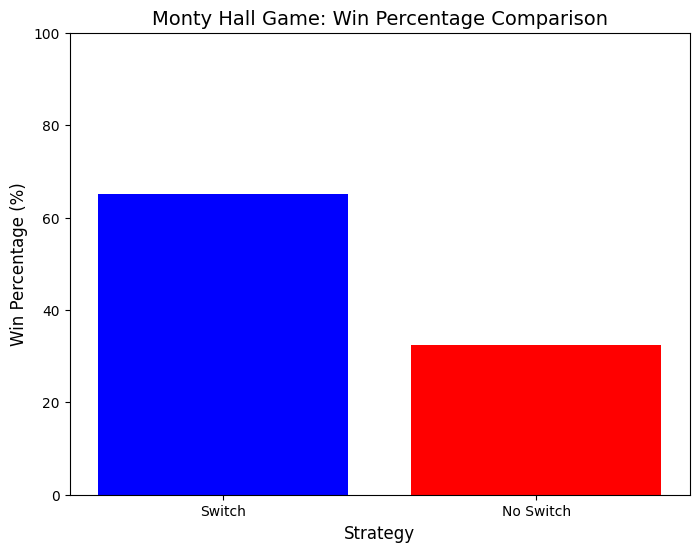

In [ ]:
import random
import matplotlib.pyplot as plt

class MontyHallGame:
    def __init__(self, trials):  # Initializing the Monty Hall problem
        self.trials = trials  # The number of trials to simulate.
        self.car_count = 0
        self.goat_count = 0

    def shuffling_doors(self):  # Shuffling three doors behind which a car and goats are placed randomly.
        doors = ['goat', 'goat', 'car']
        random.shuffle(doors)
        return doors

    def making_initial_choice(self):  # Contestant makes an initial choice to pick a door randomly
        return random.randint(0, 2)

    def revealing_goat(self, doors, contestant_choice):  # Monty reveals a goat behind one of the remaining doors.
        monty_choices = [i for i in range(3) if i != contestant_choice and doors[i] == 'goat']
        return random.choice(monty_choices)

    def switching_choice(self, contestant_choice, monty_reveal):  # Adding switch strategy, increasing the chance of winning.
        remaining_choices = [i for i in range(3) if i != contestant_choice and i != monty_reveal]
        return remaining_choices[0]

    def simulating_game(self, switch_strategy=True):  # Simulating the Monty Hall game.
        doors = self.shuffling_doors()
        contestant_choice = self.making_initial_choice()
        monty_reveal = self.revealing_goat(doors, contestant_choice)

        initial_choice = contestant_choice

        if switch_strategy:
            contestant_choice = self.switching_choice(contestant_choice, monty_reveal)

        result = doors[contestant_choice] == 'car'
        return result, initial_choice, contestant_choice

    def running_simulation(self, switch_strategy=True):  # Running a series of simulations.
        for _ in range(self.trials):
            if self.simulating_game(switch_strategy)[0]:
                self.car_count += 1
            else:
                self.goat_count += 1

        win_percentage = (self.car_count / self.trials) * 100
        return win_percentage, self.car_count

    def selecting_guest(self):
        guest_number = random.randint(1, 100)  # Randomly selecting a guest for the game
        return guest_number

    def monty_review(self, game_result):
        if game_result:
            return "Congratulations! You won! You did it!"
        else:
            return "Better luck next time!"

# Number of trials
trials = 1000

# Simulating using switching strategy
game_with_switching = MontyHallGame(trials)
switch_win_percentage, switch_car_count = game_with_switching.running_simulation(switch_strategy=True)

# Simulating without using switching strategy
game_without_switching = MontyHallGame(trials)
no_switch_win_percentage, no_switch_car_count = game_without_switching.running_simulation(switch_strategy=False)

# Simulating the selection of a random guest
guest_number = game_with_switching.selecting_guest()

# Simulating the game result for the selecting guest
game_result, initial_choice, final_choice = game_with_switching.simulating_game(switch_strategy=True)

# Monty's review based on the guest's result
review = game_with_switching.monty_review(game_result)

# Printing out the results
print(f"Using switching strategy:  won {switch_car_count} times.")
print(f"Winning percentage using switching strategy: {switch_win_percentage:.2f}%")
print()
print(f"Without using switching strategy:  won {no_switch_car_count} times.")
print(f"Winning percentage without using switching strategy: {no_switch_win_percentage:.2f}%")
print()
print(f"Guest #{guest_number} played the Monty Hall game.")
print(f"Initial choice of the guest: Door #{initial_choice + 1}")
print(f"Final choice of the guest after using switching strategy: Door #{final_choice + 1}")
print(f"Result: {'Here is a car' if game_result else 'Here is a goat'}")
print(review)

# Graphical representation of the results using matplotlib
strategies = ['Switch', 'No Switch']
win_percentages = [switch_win_percentage, no_switch_win_percentage]

plt.figure(figsize=(8, 6))
plt.bar(strategies, win_percentages, color=['blue', 'red'])
plt.title("Monty Hall Game: Win Percentage Comparison", fontsize=14)
plt.xlabel("Strategy", fontsize=12)
plt.ylabel("Win Percentage (%)", fontsize=12)
plt.ylim(0, 100)
plt.show()


